In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.datasets import load_iris, load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [2]:
# !pip install pydotplus
# !pip install dtreeviz
# !pip install supertree

In [3]:
import pydotplus
import dtreeviz
from supertree import SuperTree

# 1. Визуализация деревьев

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

## 1.1. Текстовый вывод

In [6]:
text_representation = export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## 1.2 Используя sklearn plot_tree

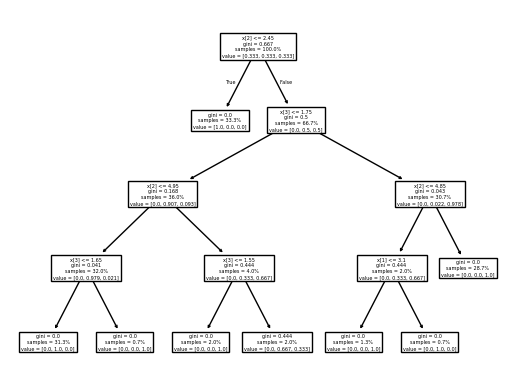

In [7]:
plot_tree(clf, proportion=True)
plt.show()

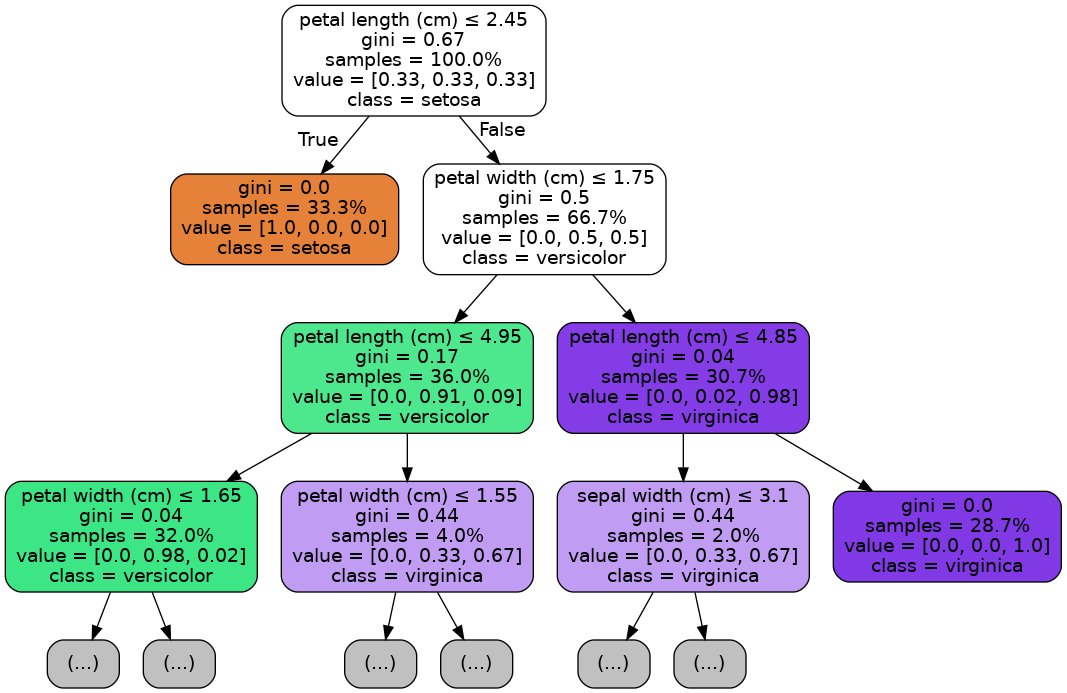

In [8]:
class_names = iris.target_names
feature_names = iris.feature_names

def vis_tree(model, out_file, max_depth):

    dot_data = export_graphviz(decision_tree=model, out_file=out_file,
                                    max_depth=max_depth,
                                    feature_names=feature_names,
                                    class_names=class_names,
                                    filled=True, rounded=True,  
                                    special_characters=True,
                                    proportion=True, precision=2,
                                    label='all', impurity=True,
                                   )  

    graph = pydotplus.graphviz.graph_from_dot_file(out_file)  
    return Image(graph.create_png())
    
vis_tree(clf, out_file="small_tree.out", max_depth=3)

## 1.3 Используя dtreeviz

https://github.com/parrt/dtreeviz

In [9]:
viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=feature_names,
                           target_name='iris',
                           class_names=class_names)

v = viz_model.view(fontname="monospace") # render as SVG into internal object 
v.show()                                 # pop up window
v.save("/tmp/iris.svg")                  # optionally save as svg

## 1.4 Используя supertree

https://github.com/mljar/supertree

In [10]:
super_tree = SuperTree(clf, X, y, feature_names, class_names)
super_tree.show_tree()

In [11]:
# Load the diabetes dataset
diabetes = load_diabetes()
X_diabet = diabetes.data
y_diabet = diabetes.target

# Train model
model = DecisionTreeRegressor()
model.fit(X_diabet, y_diabet)

# Initialize supertree
super_tree = SuperTree(model, X_diabet, y_diabet)
super_tree.show_tree()

# 2. Визуализация разделяющих функций

In [12]:
iris = load_iris()
X = iris.data[:, 0:2]
y = iris.target

class_names = iris.target_names
feature_names = iris.feature_names[0:2]

In [13]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

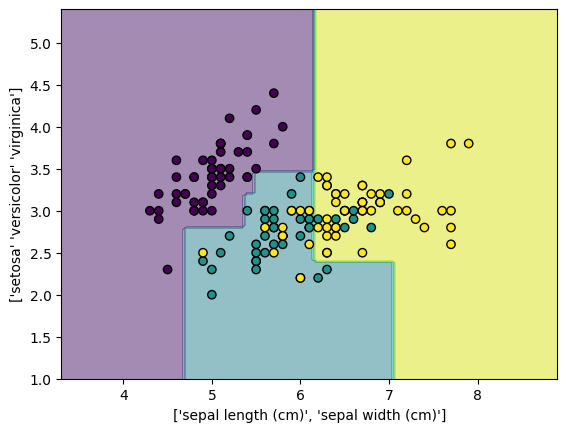

In [14]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict",
    xlabel=feature_names, ylabel=class_names,
    alpha=0.5, 
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

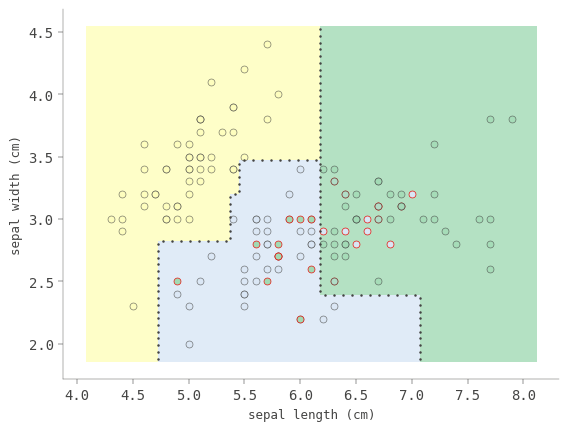

In [15]:
dtreeviz.decision_boundaries(clf, X, y, feature_names=feature_names, fontname="monospace", show=['instances', 'boundaries', 'misclassified'], tile_fraction=1.0)

# 3. Синтетические примеры

## 3.1 Xor

In [16]:
p1 = np.array([(-1, 0.1), (-0.5, 0.7), (-0.1, 0.9)])
y1 = [1, 1, 1]

p2 = np.array([(0.1, 0.1), (0.5, 0.7), (1, 1)])
y2 = [0, 0, 0]

p3 = np.array([(-1, -0.1), (-0.5, -0.7), (-0.1, -0.9)])
y3 = [0, 0, 0]

p4 = np.array([(0.1, -0.1), (0.5, -0.7), (1, -1)])
y4 = [1, 1, 1]

X = np.vstack([p1, p2, p3, p4])
y = np.hstack([y1, y2, y3, y4])

(-1.1, 1.1)

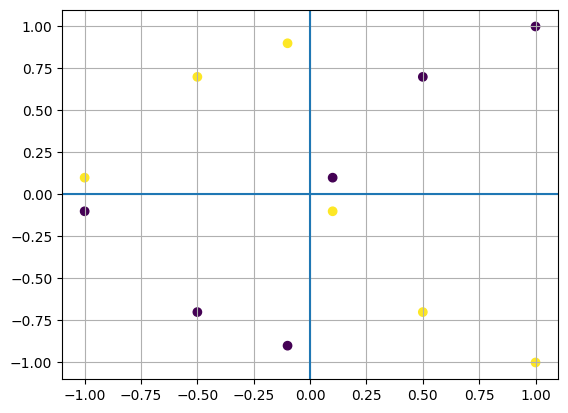

In [17]:
plt.scatter(*X.T, c=y)
plt.grid()
plt.hlines(0, -1.1, 1.1)
plt.vlines(0, -1.1, 1.1)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

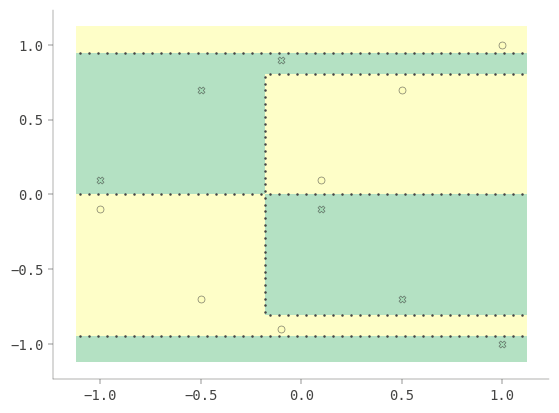

In [19]:
dtreeviz.decision_boundaries(clf, X, y, tile_fraction=1.0, fontname="monospace", show=['instances', 'boundaries', 'misclassified'], markers=['o','X'])

## 3.2 Прямая

In [20]:
def foo(x, mean=0, std=1):
    return 2 * x + 4 + np.random.normal(mean, std, size=x.shape)

In [21]:
train_size = 50
X = np.random.uniform(low=-2, high=2, size=train_size)
y = foo(X, 0, 0)

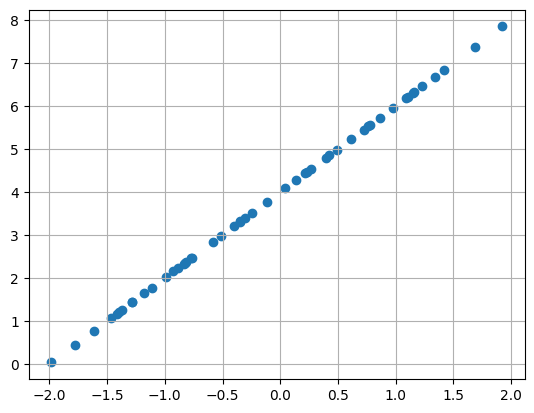

In [22]:
plt.scatter(X, y)
plt.grid()

In [23]:
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=10)

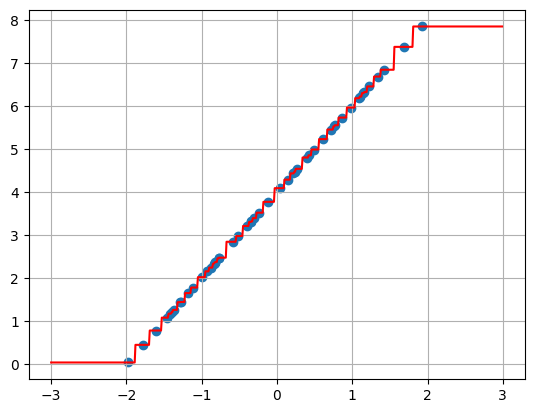

In [24]:
X_test = np.arange(-3, 3, 0.01)
y_pred = reg.predict(X_test.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(X_test, y_pred, 'r')
plt.grid()

# 4. Прунинг

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [26]:
iris = load_breast_cancer()
X = iris.data
y = iris.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

## 4.1 Pre pruning

In [28]:
params = {'max_depth': [2, 4, 6, 8, 10, 12],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [1, 2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [29]:
model = gcv.best_estimator_
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(gcv.best_params_)
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
Train score 0.978021978021978
Test score 0.9122807017543859


## 4.2 Post pruning

In [30]:
clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')

Train score 0.978021978021978
Test score 0.9122807017543859


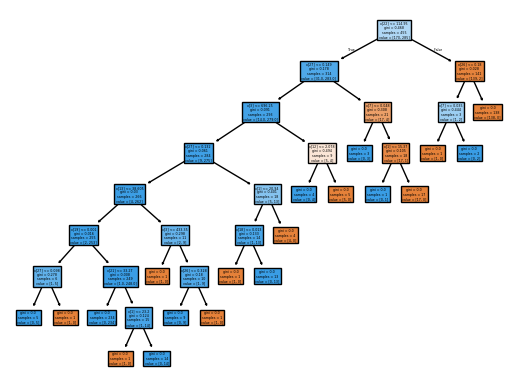

In [31]:
plot_tree(clf, filled=True);

In [32]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00218056 0.00286525 0.0029304  0.00408163 0.0041514
 0.00573611 0.00845356 0.00976801 0.01008198 0.01052328 0.0499795
 0.33658196]


In [33]:
# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

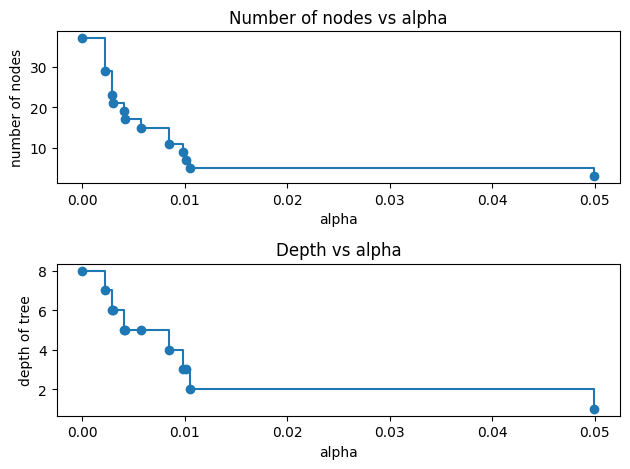

In [34]:
pruned_models = pruned_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in pruned_models]
depth = [clf.tree_.max_depth for clf in pruned_models]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [35]:
# Find the model with the best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model

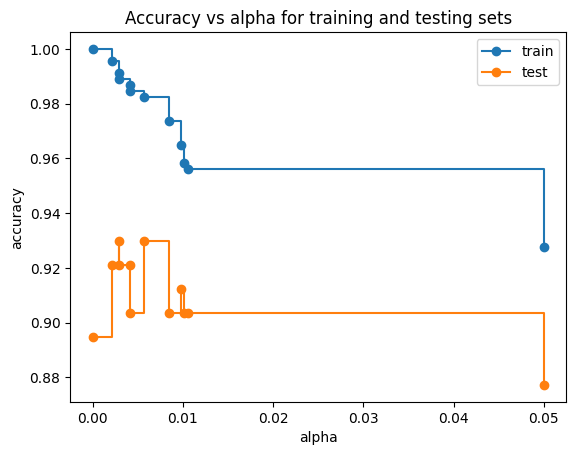

In [36]:
train_scores = [clf.score(X_train, y_train) for clf in pruned_models]
test_scores = [clf.score(X_test, y_test) for clf in pruned_models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
# Model Accuracy after pruning
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)

Accuracy after pruning: 0.9298245614035088


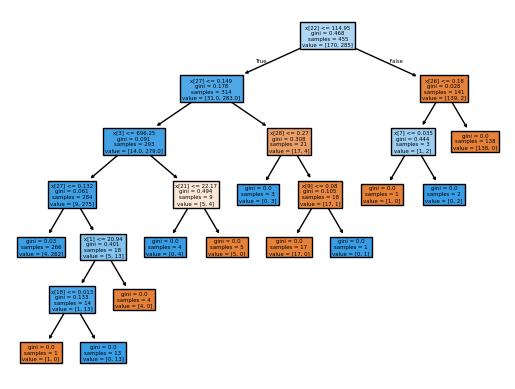

In [38]:
plot_tree(best_pruned_model, filled=True);